# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [2]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# video reference https://www.youtube.com/watch?v=pcsHj09ioMg

## capture video normal 

In [1]:
cap = cv2.VideoCapture(0)
mpFaceMesh = mp.solutions.face_mesh

with mpFaceMesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1) as face_mesh:
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame=cv2.flip(frame, 1)
        
        height, width, _ = frame.shape
        frameRgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(frameRgb)

        
        cv2.imshow('frame', frame)
        key=cv2.waitKey(20) & 0xFF
        if key==27:
            break

cap.release()
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

## capture eyes

In [3]:
cap = cv2.VideoCapture(0)
mpFaceMesh = mp.solutions.face_mesh

indexLeftEye = [33, 160, 158, 133, 153, 144]
indexRightEye = [362, 385, 387, 263, 373, 380]

with mpFaceMesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1) as face_mesh:
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame=cv2.flip(frame, 1)

        height, width, _ = frame.shape
        frameRgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(frameRgb)

        coordinates_left_eye = []
        coordinates_right_eye = []

        if results.multi_face_landmarks is not None:
            for face_landmarks in results.multi_face_landmarks:
                for index in indexLeftEye:
                    x = int(face_landmarks.landmark[index].x * width)
                    y = int(face_landmarks.landmark[index].y * height)
                    coordinates_left_eye.append([x, y])
                    cv2.circle(frame, (x, y), 2, (0, 255, 255), 1)
                    cv2.circle(frame, (x, y), 1, (128, 0, 250), 1)
                for index in indexRightEye:
                    x = int(face_landmarks.landmark[index].x * width)
                    y = int(face_landmarks.landmark[index].y * height)
                    coordinates_right_eye.append([x, y])
                    cv2.circle(frame, (x, y), 2, (128, 0, 250), 1)
                    cv2.circle(frame, (x, y), 1, (0, 255, 255), 1)

        cv2.imshow('frame', frame)
        key=cv2.waitKey(20) & 0xFF
        if key==27:
            break

cap.release()
cv2.destroyAllWindows()

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open zink: /usr/lib/dri/zink_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open zink: /usr/lib/dri/zink_dri.so: cannot open shared object file: 

## FINISH DETECTOR

In [1]:
cap = cv2.VideoCapture(0)
mpFaceMesh = mp.solutions.face_mesh

EAR_THRESH=0.24
count=0
indexLeftEye = [33, 160, 158, 133, 153, 144]
indexRightEye = [362, 385, 387, 263, 373, 380]

def eye_aspect_ratio(coordinates):
    d_A = np.linalg.norm(np.array(coordinates[1]) - np.array(coordinates[5]))
    d_B = np.linalg.norm(np.array(coordinates[2]) - np.array(coordinates[4]))
    d_C = np.linalg.norm(np.array(coordinates[0]) - np.array(coordinates[3]))
    return (d_A + d_B) / (2 * d_C)


with mpFaceMesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1) as face_mesh:
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame=cv2.flip(frame, 1)

        height, width, _ = frame.shape
        frameRgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(frameRgb)

        coordinates_left_eye = []
        coordinates_right_eye = []

        if results.multi_face_landmarks is not None:
            for face_landmarks in results.multi_face_landmarks:
                for index in indexLeftEye:
                    x = int(face_landmarks.landmark[index].x * width)
                    y = int(face_landmarks.landmark[index].y * height)
                    coordinates_left_eye.append([x, y])
                    cv2.circle(frame, (x, y), 2, (0, 255, 255), 1)
                    cv2.circle(frame, (x, y), 1, (128, 0, 250), 1)
                for index in indexRightEye:
                    x = int(face_landmarks.landmark[index].x * width)
                    y = int(face_landmarks.landmark[index].y * height)
                    coordinates_right_eye.append([x, y])
                    cv2.circle(frame, (x, y), 2, (128, 0, 250), 1)
                    cv2.circle(frame, (x, y), 1, (0, 255, 255), 1)

            ear_left_eye = eye_aspect_ratio(coordinates_left_eye)
            ear_right_eye = eye_aspect_ratio(coordinates_right_eye)
            ear = (ear_left_eye + ear_right_eye)/2
            
            if ear > EAR_THRESH and count <= 30:
                count += 1
            elif ear < EAR_THRESH and count >= -30:
                count -=1
            if(count>0):
                print("DESPIERTO"+str(count))
            else:
                print("DORMIDO"+str(count))
        
        cv2.imshow('frame', frame)
        key=cv2.waitKey(20) & 0xFF
        if key==27:
            break

cap.release()
cv2.destroyAllWindows()


NameError: name 'cv2' is not defined

## CODE REFERENCE EYELID DETECTOR


libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open zink: /usr/lib/dri/zink_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: 

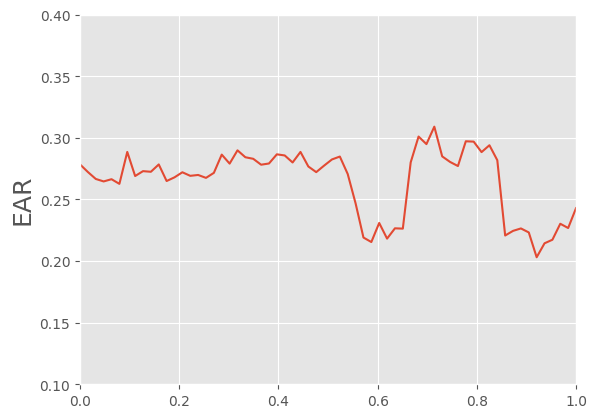

In [3]:
def drawing_output(frame, coordinates_left_eye, coordinates_right_eye, blink_counter):
    aux_image = np.zeros(frame.shape, np.uint8)
    contours1 = np.array([coordinates_left_eye])
    contours2 = np.array([coordinates_right_eye])
    cv2.fillPoly(aux_image, pts=[contours1], color=(255, 0, 0))
    cv2.fillPoly(aux_image, pts=[contours2], color=(255, 0, 0))
    output = cv2.addWeighted(frame, 1, aux_image, 0.7, 1)
    cv2.rectangle(output, (0, 0), (200, 50), (255, 0, 0), -1)
    cv2.rectangle(output, (202, 0), (265, 50), (255, 0, 0), 2)
    cv2.putText(output, "Num. Parpadeos:", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
    cv2.putText(output, "{}".format(blink_counter), (220, 35), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (128, 0, 250), 2)

    return output

def eye_aspect_ratio(coordinates):
    d_A = np.linalg.norm(np.array(coordinates[1]) - np.array(coordinates[5]))
    d_B = np.linalg.norm(np.array(coordinates[2]) - np.array(coordinates[4]))
    d_C = np.linalg.norm(np.array(coordinates[0]) - np.array(coordinates[3]))
    return (d_A + d_B) / (2.0 * d_C)

def plotting_ear(pts_ear, line1):
    global figure
    pts = np.linspace(0, 1, len(pts_ear))
    if line1 == []:
        plt.style.use("ggplot")
        plt.ion()
        figure, ax = plt.subplots()
        line1, = ax.plot(pts, list(pts_ear))
        plt.ylim(0.1, 0.4)
        plt.xlim(0, 1)
        plt.ylabel("EAR", fontsize=18)
    else:
        line1.set_ydata(list(pts_ear))
        figure.canvas.draw()
        figure.canvas.flush_events()

    return line1

# Configuración inicial
cap = cv2.VideoCapture(0)
mp_face_mesh = mp.solutions.face_mesh
index_left_eye = [33, 160, 158, 133, 153, 144]
index_right_eye = [362, 385, 387, 263, 373, 380]
EAR_THRESH = 0.26
NUM_FRAMES = 2
aux_counter = 0
blink_counter = 0
line1 = []
pts_ear = deque(maxlen=64)
i = 0

with mp_face_mesh.FaceMesh(
        static_image_mode=False,
        max_num_faces=1,
        refine_landmarks=True) as face_mesh:
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.flip(frame, 1)
        height, width, _ = frame.shape
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(frame_rgb)
        coordinates_left_eye = []
        coordinates_right_eye = []

        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                for index in index_left_eye:
                    x = int(face_landmarks.landmark[index].x * width)
                    y = int(face_landmarks.landmark[index].y * height)
                    coordinates_left_eye.append([x, y])
                    cv2.circle(frame, (x, y), 2, (0, 255, 255), 1)
                for index in index_right_eye:
                    x = int(face_landmarks.landmark[index].x * width)
                    y = int(face_landmarks.landmark[index].y * height)
                    coordinates_right_eye.append([x, y])
                    cv2.circle(frame, (x, y), 2, (128, 0, 250), 1)

            # Cálculo de la relación de aspecto del ojo
            ear_left_eye = eye_aspect_ratio(coordinates_left_eye)
            ear_right_eye = eye_aspect_ratio(coordinates_right_eye)
            ear = (ear_left_eye + ear_right_eye) / 2.0

            # Detección de parpadeo
            if ear < EAR_THRESH:
                aux_counter += 1
            else:
                if aux_counter >= NUM_FRAMES:
                    aux_counter = 0
                    blink_counter += 1

            # Dibujar resultados
            frame = drawing_output(frame, coordinates_left_eye, coordinates_right_eye, blink_counter)
            pts_ear.append(ear)
            if i > 70:
                line1 = plotting_ear(pts_ear, line1)
            i += 1

        # Mostrar el frame
        cv2.imshow("Frame", frame)
        k = cv2.waitKey(1) & 0xFF
        if k == 27:  # ESC para salir
            break

cap.release()
cv2.destroyAllWindows()
